# Building Unimodal Image Modal

In [1]:
cd ..

e:\notebooks\MultimodalTweetsClassification


In [2]:
#ensuring that any edits to libraries you make are reloaded here automatically
#to ensuere charts or images displayed are shown in this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#importing required modules
from exp.Required_Modules_And_Packages import *
from exp.Data_Reading_And_Preprocessing import *
from exp.Required_Integration_Functionalities_For_Transformer_To_Fastai import *
from exp.Required_Functionalities_To_Handal_Multimodal_Dataset import *
from exp.Multimodal_Model_With_Intermediate_Or_EmbraceNet_Fusion import *

In [4]:
import os
print(os.getcwd())


e:\notebooks\MultimodalTweetsClassification


In [5]:
# path = Path('/notebooks/MultimodalTweetsClassification')
path = Path('E:/notebooks/MultimodalTweetsClassification')
path.ls()

[WindowsPath('E:/notebooks/MultimodalTweetsClassification/.venv'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/backup'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/data'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/exp'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/Images'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/models'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/notebooks'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/README.md'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/requirement.txt'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/Summer Internship Report.pdf'),
 WindowsPath('E:/notebooks/MultimodalTweetsClassification/venv')]

In [6]:
path_img = path/'data_image'

In [7]:
#reading csv files and doing initial necessary processing
data_human_image,test_data_human_image = get_dataframe(*get_tsv_data_files('humanitarian_task_tsv_files'),path)

reading data and preprocessing it.....
done!!


In [8]:
# Uncomment the code if dataset and labels are in .tar.gz and .zip format respectively

# data = "CrisisMMD_v2.tar"
# agreed_label = "crisismmd_datasplit_agreed_label.zip"
# untar_data_and_unzip_label(data,agreed_label)

In [9]:
#reading csv files and doing initial necessary processing
data_human_image,test_data_human_image = get_dataframe(*get_tsv_data_files('humanitarian_task_tsv_files'),path)

reading data and preprocessing it.....
done!!


E:\notebooks\MultimodalTweetsClassification\data\task_informative_text_img_agreed_lab_train.tsv

In [10]:
print(f"shape of data: {data_human_image.shape}\n")
print(f"train set: {data_human_image['is_valid'].value_counts()[0]}")
print(f"valid set: {data_human_image['is_valid'].value_counts()[1]}")      
print("="*50)
print(f"shape of test data: {test_data_human_image.shape}\n")

shape of data: (15845, 10)

train set: 13608
valid set: 2237
shape of test data: (2237, 9)



In [11]:
# Filter train and validation sets
train_df = data_human_image[data_human_image['is_valid'] == False]
valid_df = data_human_image[data_human_image['is_valid'] == True]

# Sample 5000 training and 2000 validation examples
train_sample = train_df.sample(n=5000, random_state=42)
valid_sample = valid_df.sample(n=2000, random_state=42)

# Reassign back to the original variable
data_human_image = pd.concat([train_sample, valid_sample]).reset_index(drop=True)

# Print new statistics
print(f"shape of data: {data_human_image.shape}\n")
print(f"train set: {data_human_image['is_valid'].value_counts()[0]}")
print(f"valid set: {data_human_image['is_valid'].value_counts()[1]}")
print("="*50)
print(f"shape of test data: {test_data_human_image.shape}\n")


shape of data: (7000, 10)

train set: 5000
valid set: 2000
shape of test data: (2237, 9)



In [12]:
data_human_image.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid
0,hurricane_harvey,908373446924611586,908373446924611586_0,marine corps league members save dog chained t...,data_image/hurricane_harvey/14_9_2017/90837344...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,Positive,False
1,srilanka_floods,870004426542505984,870004426542505984_0,camp muir webcam is up fog in the valleys but ...,data_image/srilanka_floods/31_5_2017/870004426...,infrastructure_and_utility_damage,other_relevant_information,infrastructure_and_utility_damage,Negative,False
2,srilanka_floods,875965424420126720,875965424420126720_0,sadrith mora fancy elevators morrowind eso ps,data_image/srilanka_floods/17_6_2017/875965424...,not_humanitarian,not_humanitarian,not_humanitarian,Positive,False
3,hurricane_maria,921761421351731200,921761421351731200_0,puerto rico ticket is lower today it may be si...,data_image/hurricane_maria/21_10_2017/92176142...,not_humanitarian,not_humanitarian,not_humanitarian,Positive,False
4,hurricane_maria,912013287184666624,912013287184666624_0,hurricane maria causes rough surf at daytona b...,data_image/hurricane_maria/24_9_2017/912013287...,other_relevant_information,other_relevant_information,not_humanitarian,Negative,False


In [13]:
test_data_human_image.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image
0,hurricane_harvey,905952332923338752,905952332923338752_0,has great event tomorrow for both byu and utah...,data_image/hurricane_harvey/8_9_2017/905952332...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,Positive
1,mexico_earthquake,912022130396672000,912022130396672000_0,now also carlo surf band at pm pwyc mexicoeart...,data_image/mexico_earthquake/24_9_2017/9120221...,not_humanitarian,not_humanitarian,not_humanitarian,Positive
2,mexico_earthquake,910700764808564736,910700764808564736_0,earthquake in mexico rocks ph embassy no filip...,data_image/mexico_earthquake/21_9_2017/9107007...,infrastructure_and_utility_damage,other_relevant_information,infrastructure_and_utility_damage,Negative
3,hurricane_maria,927758858776465408,927758858776465408_0,guaynabo resident efrain diaz stands by bridge...,data_image/hurricane_maria/7_11_2017/927758858...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive
4,hurricane_harvey,907654309587779584,907654309587779584_0,after harvey irma leaves its own trail of dest...,data_image/hurricane_harvey/12_9_2017/90765430...,other_relevant_information,other_relevant_information,other_relevant_information,Positive


In [14]:
#creating image databunch object for data(train and dev split) and test data(test split)
data_img = get_image_data(data_human_image,path,224)
test_data_img = get_test_image_data(test_data_human_image,path,224)

In [15]:
# making single databunch object of data and test data
data_img.add_test(test_data_img.x)
data_img.test_ds.y = test_data_img.y

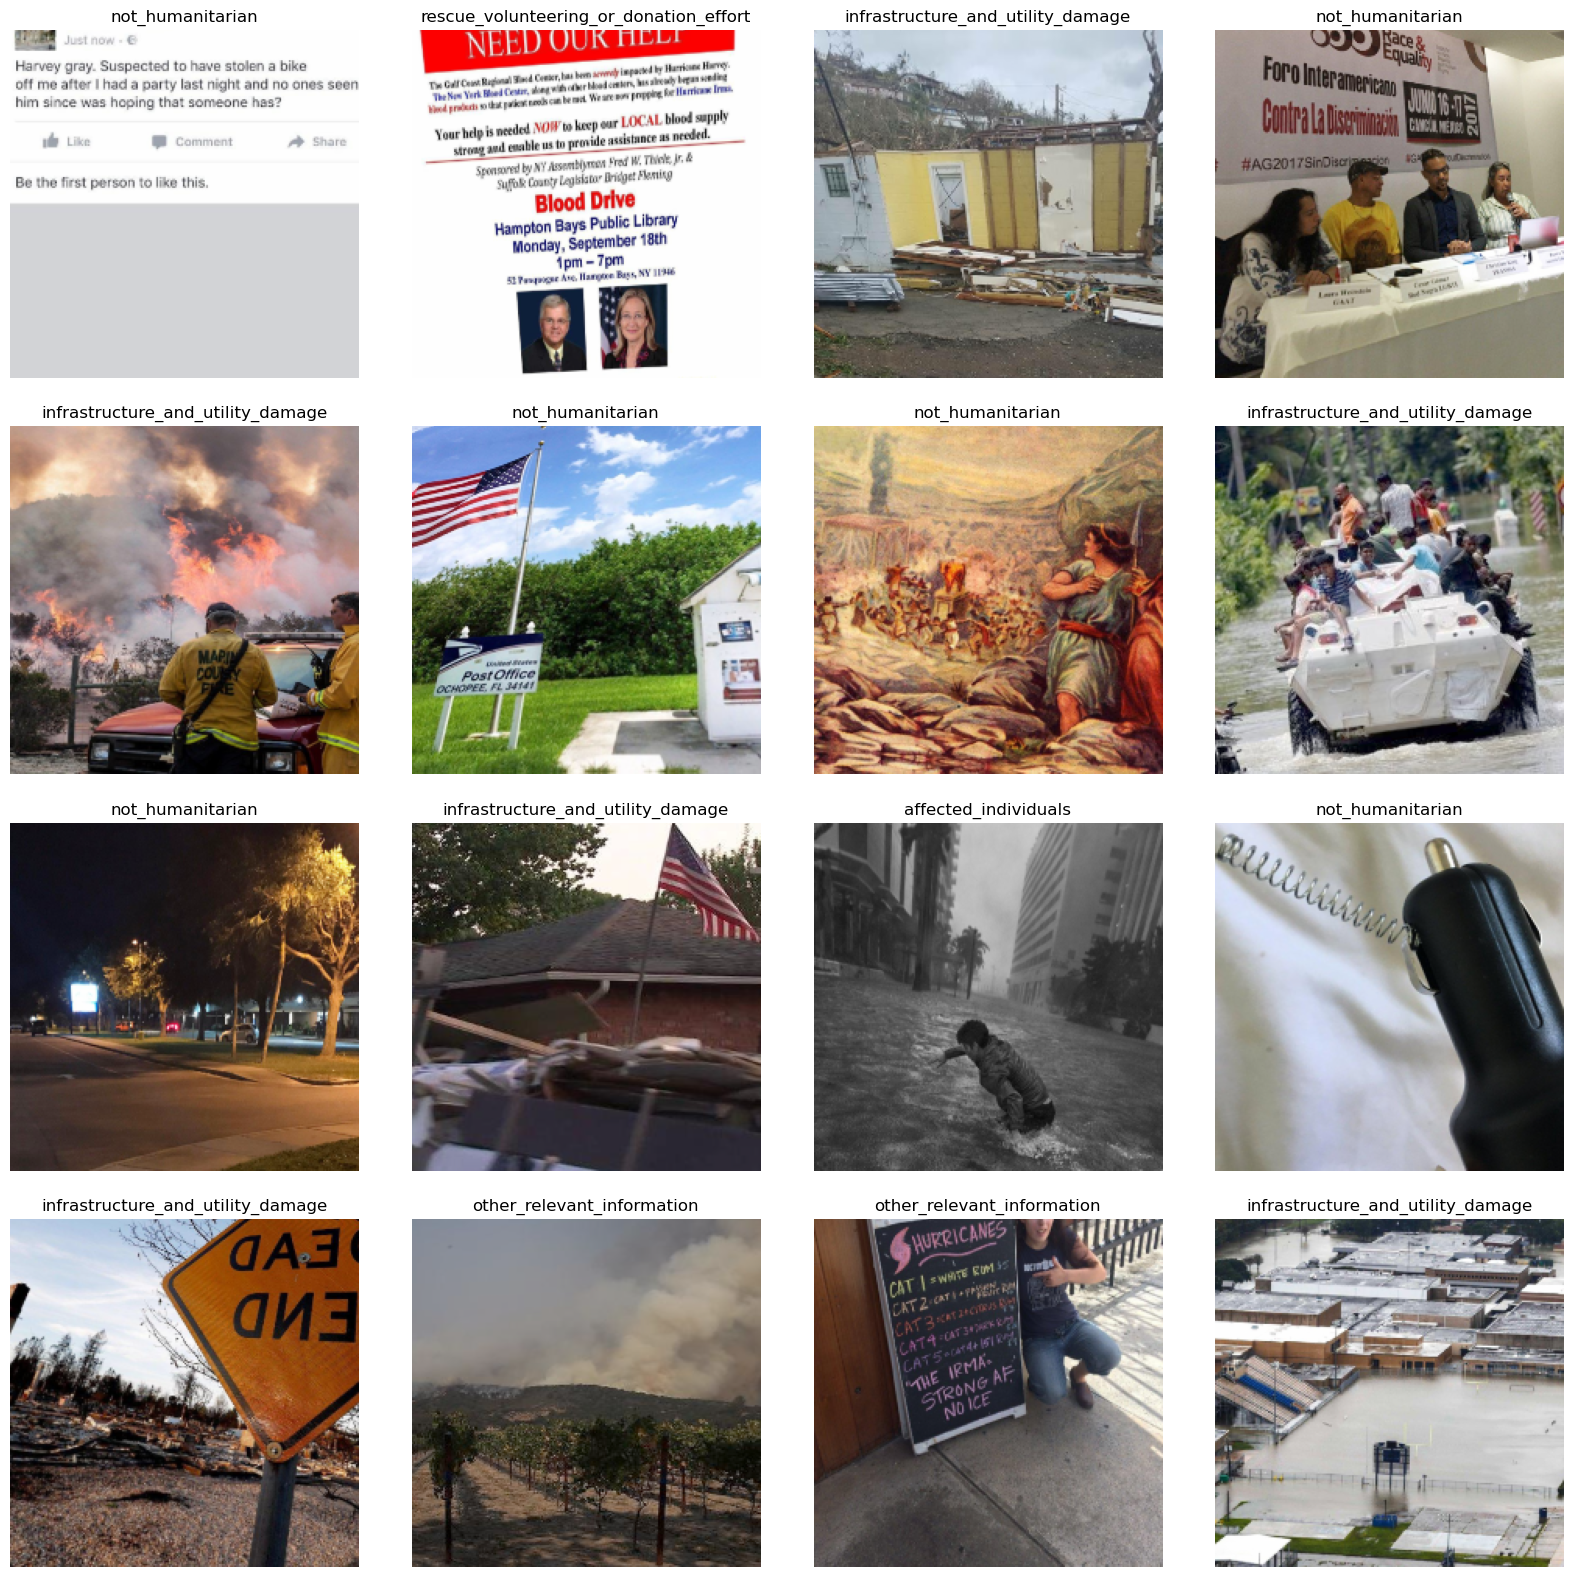

In [16]:
data_img.show_batch()

In [17]:
#creating learner object with callbacks
arch = models.resnet50
learn_img = cnn_learner(data_img, arch, metrics=[accuracy,Precision1(average='macro'),
                Precision1(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=3),
               partial(ReduceLROnPlateauCallback,monitor='accuracy', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)])

In [18]:
# arch = models.resnet18
# learn_img = cnn_learner(data_img, arch, metrics=[accuracy],
#             callback_fns=[
#                 partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=3),
#                 partial(ReduceLROnPlateauCallback, monitor='accuracy', mode='auto', patience=1)
#             ])


In [19]:
# training model using discriminative fine-tunnig and gradual unfreezing
learn_img.lr_find()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


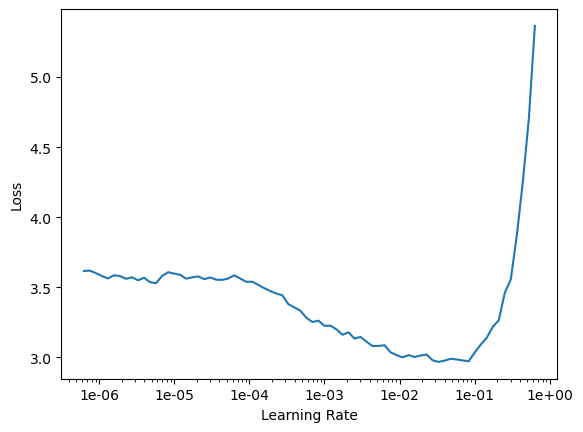

In [20]:
learn_img.recorder.plot()

In [21]:
lr = 0.0001


epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


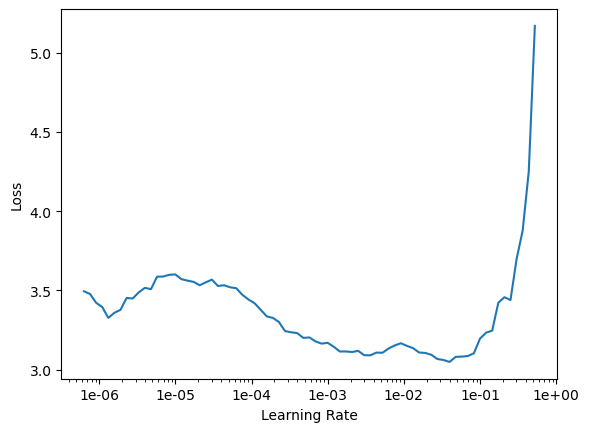

In [22]:
learn_img.unfreeze()
learn_img.lr_find()
learn_img.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,1.623000,1.538629,0.650500,0.379179,0.655178,0.388223,0.650500,0.373271,0.647185,39:04


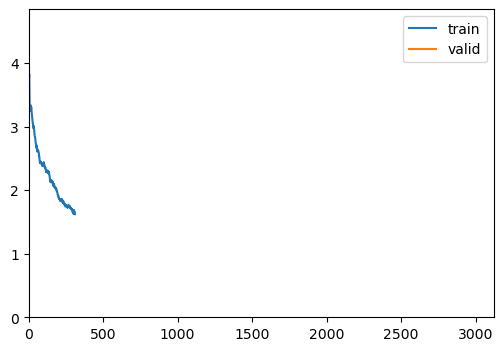

Better model found at epoch 0 with accuracy value: 0.6504999995231628.


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 6422528 bytes. Buy new RAM!


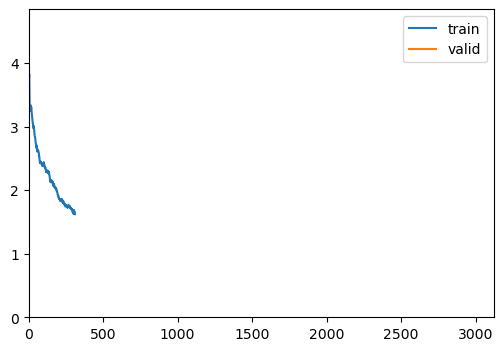

In [23]:
learn_img.fit_one_cycle(10, slice(1e-4, 1e-3),
                       callbacks=[SaveModelCallback(learn_img,every='improvement', monitor='accuracy', name='best')])

In [ ]:
learn_img.validate(data_img.valid_dl,metrics=[accuracy,Precision(average='macro'),Precision(average='weighted'),
                                                 Recall(average='macro'),Recall(average='weighted'),
                                                 FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)])

In [ ]:
# making interpretation on dev split
interp = ClassificationInterpretation.from_learner(learn_img)

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
#making predictions on dev set to use it for classification report
preds,y,losses = learn_img.get_preds(with_loss=True)
y_preds = preds.argmax(1)

In [ ]:
target_names = ['affected_individuals',
 'infrastructure_and_utility_damage',
 'not_humanitarian',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort']

print(classification_report(y, y_preds, target_names=target_names))

In [ ]:
#making interpretation on test split
interp = ClassificationInterpretation.from_learner(learn_img,ds_type=DatasetType.Test)
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
#making predictions on test set to use it for classification report
preds,y,losses = learn_img.get_preds(ds_type=DatasetType.Test,with_loss=True)
y_preds = preds.argmax(1)

In [ ]:
print(classification_report(y, y_preds, target_names=target_names))